# <center> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготовливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии теперь будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим неколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *csv_files_mask* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Сессии должны быть уникальными, можно использовать pandas.DataFrame.drop_duplicates
- Замеряйте время выполнения итераций цикла с помощью *time* из *time* (или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress), [статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import pickle
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from time import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
def sparsematrix(X):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in X:
        for term in d:
            if term != 0:
                index = vocabulary.setdefault(term, len(vocabulary))
                indices.append(index)
                data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)

In [66]:
def sitefreq(sites, site_freq={}):
    if len(site_freq):
        site_id = max(site_freq.items(), key=lambda t: t[1][0])[1][0] + 1
    else:
        site_id = 1
        
    for site in sites:
        if site not in site_freq:
            site_freq[site] = [site_id, 1]
            site_id += 1
        else:
            site_freq[site][1] += 1
            
    return site_freq

In [202]:
def prepare_sparse_train_set_window(csv_files_mask, site_freq_path="", 
                                    session_length=10, window_size=10):
    
    start = time()
    
    train_data = np.array([np.zeros(session_length+1)])
    site_freq = {}
    columns=["site" + str(x) for x in range (1, session_length+1)] + ["target"]
    
    if site_freq_path != "":
        pkl_file = open(site_freq_path, 'rb')
        site_freq = pickle.load(pkl_file)
    
    for userfile in glob(csv_files_mask):
        data = pd.read_csv(userfile, header=None, names=['userid', 'timestamp', 'site'])
        user_id = data.userid[0]
        session_hash = {}
        
        if site_freq_path == "":
            site_freq = sitefreq(data.site, site_freq)
        
        for i in range (0, len(data), window_size):
            session = tuple(data[i:i+session_length].site.apply(lambda x: site_freq[x][0]))           
            if session not in session_hash:
                session_hash[session] = 1
                session = [np.append(session, np.append(np.zeros(session_length - len(session)), user_id))]
                train_data = np.concatenate((train_data, session))
    
    train_data = np.delete(train_data, 0, 0)
    #train_data = pd.DataFrame(np.delete(train_data, 0, 0), columns=columns)
    X, y = train_data[:, :-1], train_data[:, -1]
    X_sparse = sparsematrix(X)

    end = time()
    print(csv_files_mask)
    print("Session length:", session_length, " Window Size:", window_size)
    print("Elapsed time: %f" % (end - start), "seconds\n")
    return X_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [110]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window('capstone_websites_data/3users_toy/*', 
                                                       'capstone_websites_data/site_freq_3users.pkl',
                                       session_length=5, window_size=3)

capstone_websites_data/3users_toy/*
Session length: 5  Window Size: 3
Elapsed time: 0.007159 seconds



In [99]:
X_toy_s5_w3.shape[0]

12

In [37]:
X_toy_s5_w3.todense()

matrix([[1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [4]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы 'capstone_websites_data/X\_sparse_{num_users}users_s{session_length}_w{window_size}.pkl' и 'capstone\_websites\_data/y\_{num_users}users_s{session_length}_w{window_size}.pkl'.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 45 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [208]:
%%time
from multiprocessing import Process, Queue, current_process, freeze_support
import itertools

data_lengths = []

#
# Function run by worker processes
#

def worker(input, output):
    for func, args in iter(input.get, 'STOP'):
        result = calculate(func, args)
        output.put(result)

#
# Function used to calculate result
#

def calculate(func, args):
    result = func(*args)
    #return '%s says that %s%s = %s' % \
        #(current_process().name, func.__name__, args, result)
    return result


def multithreadrun():
    data_lengths = {}
    NUMBER_OF_PROCESSES = 16
    TASKS = []
    counter = 0 # to keep the order of output data_lengths
    for num_users in [10, 150]:
        for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
            if window_size <= session_length and (window_size, session_length) != (10, 10):
                TASKS.append(((pickles, (num_users, session_length, window_size, counter))))
                counter += 1
    
    # Create queues
    task_queue = Queue()
    done_queue = Queue()
    
    # Submit tasks
    for task in TASKS:
        task_queue.put(task)
        
    # Start worker processes
    for i in range(NUMBER_OF_PROCESSES):
        Process(target=worker, args=(task_queue, done_queue)).start()
        
    # Get and print results
    print ('Unordered results:')
    for i in range(len(TASKS)):
        res = done_queue.get()
        data_lengths[res[0]] = res[1]
        #print ('\t', done_queue.get())
        
    # Tell child processes to stop
    for i in range(NUMBER_OF_PROCESSES):
        task_queue.put('STOP')
    
    #print (sorted(data_lengths.items()))
    return [x[1] for x in sorted(data_lengths.items())]
    
if __name__ == '__main__':
    freeze_support()
    data_lengths = multithreadrun()

Unordered results:
capstone_websites_data/10users/*
Session length: 15  Window Size: 10
Elapsed time: 26.050043 seconds

capstone_websites_data/10users/*
Session length: 7  Window Size: 7
Elapsed time: 33.532131 seconds

capstone_websites_data/10users/*
Session length: 10  Window Size: 7
Elapsed time: 34.013579 seconds

capstone_websites_data/10users/*
Session length: 15  Window Size: 7
Elapsed time: 40.689723 seconds

capstone_websites_data/10users/*
Session length: 5  Window Size: 5
Elapsed time: 43.640386 seconds

capstone_websites_data/10users/*
Session length: 7  Window Size: 5
Elapsed time: 49.042748 seconds

capstone_websites_data/10users/*
Session length: 10  Window Size: 5
Elapsed time: 58.425575 seconds

capstone_websites_data/10users/*
Session length: 15  Window Size: 5
Elapsed time: 68.297566 seconds

capstone_websites_data/150users/*
Session length: 15  Window Size: 10
Elapsed time: 761.625602 seconds

capstone_websites_data/150users/*
Session length: 7  Window Size: 7
Ela

In [205]:
def pickles(num_users, session_length, window_size, counter):
    if window_size <= session_length and (window_size, session_length) != (10, 10):
        X_sparse, y = prepare_sparse_train_set_window('capstone_websites_data/'+str(num_users)+'users/*', 
                                                           'capstone_websites_data/site_freq_'+str(num_users)+'users.pkl',
                                                           session_length=session_length, window_size=window_size)
        with open('capstone_websites_data/X_sparse_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl', 'wb') as X_pkl:
            pickle.dump(X_sparse, X_pkl)
        with open('capstone_websites_data/y_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl', 'wb') as y_pkl:
            pickle.dump(y, y_pkl)
        return (counter, X_sparse.shape[0])
    else:
        return None

In [167]:
# Single-threaded alternative
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window('capstone_websites_data/'+str(num_users)+'users/*', 
                                                       'capstone_websites_data/site_freq_'+str(num_users)+'users.pkl',
                                                       session_length=session_length, window_size=window_size)
            
            with open('capstone_websites_data/X_sparse_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl', 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl)
            with open('capstone_websites_data/y_'+str(num_users)+'users_s'+str(session_length)+'_w'+str(window_size)+'.pkl', 'wb') as y_pkl:
                pickle.dump(y, y_pkl)
            data_lengths.append(X_sparse.shape[0])

capstone_websites_data/10users/*
Session length: 15  Window Size: 10
Elapsed time: 4.048364 seconds

capstone_websites_data/10users/*
Session length: 15  Window Size: 7
Elapsed time: 6.158582 seconds

capstone_websites_data/10users/*
Session length: 10  Window Size: 7
Elapsed time: 6.099041 seconds

capstone_websites_data/10users/*
Session length: 7  Window Size: 7
Elapsed time: 6.076939 seconds

capstone_websites_data/10users/*
Session length: 15  Window Size: 5
Elapsed time: 10.688160 seconds

capstone_websites_data/10users/*
Session length: 10  Window Size: 5
Elapsed time: 8.052155 seconds

capstone_websites_data/10users/*
Session length: 7  Window Size: 5
Elapsed time: 7.310144 seconds

capstone_websites_data/10users/*
Session length: 5  Window Size: 5
Elapsed time: 7.109303 seconds

CPU times: user 57.5 s, sys: 520 ms, total: 58 s
Wall time: 57.1 s


**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [102]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [210]:
datal = " ".join(str(x) for x in data_lengths)
datal

'13554 19297 18490 17611 26889 25683 24376 22539 132629 189138 186063 181281 264261 259440 251786 237928'

In [211]:
write_answer_to_file(datal, 
                     'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл train_data_10users.csv. Далее будем работать с ним.**

In [5]:
train_df = pd.read_csv('capstone_websites_data/train_data_10users.csv', 
                       index_col='session_id')

In [6]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,target
session_id,,,,,,,,,,,
0,1,2,3,4,5,1,2,4,5,3,128
1,3,6,7,8,6,8,7,8,9,1,128
2,3,9,7,3,10,11,8,8,10,8,128
3,8,7,3,3,11,3,3,12,12,13,128
4,13,9,10,12,12,13,12,12,14,15,128


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13084 entries, 0 to 14060
Data columns (total 11 columns):
site1     13084 non-null int64
site2     13084 non-null int64
site3     13084 non-null int64
site4     13084 non-null int64
site5     13084 non-null int64
site6     13084 non-null int64
site7     13084 non-null int64
site8     13084 non-null int64
site9     13084 non-null int64
site10    13084 non-null int64
target    13084 non-null int64
dtypes: int64(11)
memory usage: 1.2 MB


**Распределение целевого класса:**

In [215]:
train_df['target'].value_counts()

128    2340
39     1964
207    1853
127    1652
237    1612
33      993
31      751
50      747
100     649
241     523
Name: target, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [216]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [368]:
np.unique(num_unique_sites)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [217]:
pd.Series(num_unique_sites).value_counts()

7     2244
6     2242
5     1870
8     1768
4     1289
9     1101
3     1067
2      993
10     427
1       83
dtype: int64

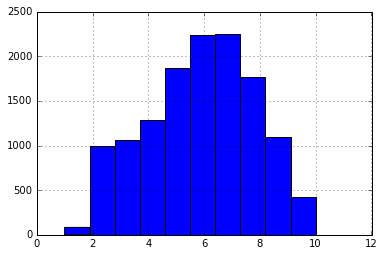

In [218]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответ на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

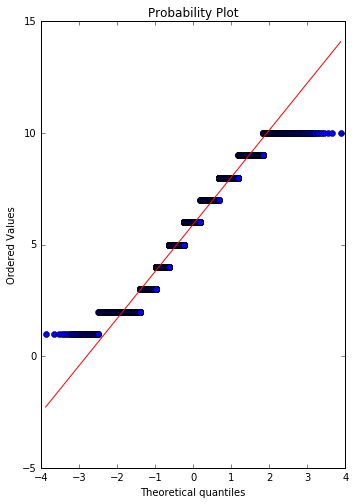

In [226]:
pylab.figure(figsize=(12,8))
pylab.subplot(1,2,1)
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()

In [228]:
print ("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(num_unique_sites))

Shapiro-Wilk normality test, W-statistic: 0.962276, p-value: 0.000000


In [229]:
write_answer_to_file("NO", 
                     'answer2_2.txt')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Конкретно, проверьте с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет порядок полученного p-value (например, если p=2.3e-4, то ответ будет -4).**

In [230]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [241]:
len(has_two_similar)

13084

In [250]:
sum(has_two_similar)

12657

In [257]:
stats.binom_test(x=sum(has_two_similar), n=len(has_two_similar), p=0.95, alternative = 'greater')

1.9143919813300797e-22

Да, p-value очень мало, то есть доля таких случаев существенно больше 95%

In [258]:
write_answer_to_file(-22, 
                     'answer2_3.txt')

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответов на 4 вопрос теста.**

In [261]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')
wilson_interval

(0.96418039542443412, 0.97027468935636896)

In [260]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [315]:
pkl_file = open('capstone_websites_data/site_freq_10users.pkl', 'rb')
site_freqs = pickle.load(pkl_file)
{k: v for k, v in site_freqs.iteritems() if v[1] > 1000}

{'accounts.google.com': [1, 2089],
 'accounts.youtube.com': [2, 1057],
 'apis.google.com': [7, 3758],
 'clients1.google.com': [182, 1493],
 'clients6.google.com': [53, 1039],
 'download.jboss.org': [2744, 1441],
 'fr-mg42.mail.yahoo.com': [57, 1868],
 'i1.ytimg.com': [175, 1232],
 'mail.google.com': [3, 4158],
 'platform.twitter.com': [43, 1041],
 'plus.google.com': [8, 2630],
 'r1---sn-gxo5uxg-jqbe.googlevideo.com': [186, 3094],
 'r2---sn-gxo5uxg-jqbe.googlevideo.com': [189, 1939],
 'r3---sn-gxo5uxg-jqbe.googlevideo.com': [177, 3244],
 'r4---sn-gxo5uxg-jqbe.googlevideo.com': [184, 1702],
 's-static.ak.facebook.com': [44, 1388],
 's.youtube.com': [176, 8300],
 'safebrowsing-cache.google.com': [913, 1039],
 'static.ak.facebook.com': [93, 1265],
 'translate.google.fr': [1256, 1002],
 'twitter.com': [90, 1204],
 'www.facebook.com': [45, 4141],
 'www.google.com': [9, 5441],
 'www.google.fr': [28, 7813],
 'www.youtube.com': [174, 1804]}

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [7]:
x = train_df.values[:, :-1].flatten()
x = x[np.nonzero(x)]

In [8]:
len(x)

130804

In [13]:
samples = get_bootstrap_samples(np.array(x), 4913)

In [10]:
meanfreqs = []
for sample in samples:
    y = np.bincount(sample)
    ii = np.nonzero(y)[0]
    freq = zip(ii, y[ii])
    only_freq = [f for i, f in freq]
    meanfreq = mean(only_freq)
    meanfreqs.append(meanfreq)

In [11]:
mean(meanfreqs)

31.220095158131894

In [457]:
print ("95% confidence interval:",  stat_intervals(meanfreqs, 0.05))

95% confidence interval: [ 30.89371752  31.54183747]


In [459]:
y = np.bincount(x)
ii = np.nonzero(y)[0]
new_freqs = zip(ii,y[ii])
new_only_freqs = [f for i, f in new_freqs]

In [460]:
mean(new_only_freqs)

26.624058619987789

In [438]:
freqs = [v for k, v in site_freqs.iteritems()]
freqs = np.array([x[1][1] for x in sorted(site_freqs.items(), key=lambda t: t[1][0], reverse=False)])
#sorted(site_freqs.items(), key=lambda t: t[1][0], reverse=False)
len(freqs)

4913

In [2]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [3]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [441]:
mean_freq = map(np.mean, get_bootstrap_samples(np.array(new_only_freqs), len(new_only_freqs)))
print ("95% confidence interval:",  stat_intervals(mean_freq, 0.05))
stat_int = stat_intervals(mean_freq, 0.05)

95% confidence interval: [ 21.02939141  33.14341543]


In [440]:
write_answer_to_file('{} {}'.format(round(stat_int[0], 3), round(stat_int[1], 3)), 
                                    'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (.ipynb или pdf) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can-yandex-mipt) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.